### Caso de estudio --- Segmentación de clientes

#### Definición

La segmentación de clientes es la práctica de separar a los clientes en grupos que reflejen las similitudes entre los clientes de cada grupo.

#### Proceso

Dividir a los clientes en segmentos para optimizar la importancia de cada cliente para la empresa.

#### Problema

Una empresa de comestibles requiere modificar los productos en función de las distintas necesidades y comportamientos de sus clientes. Para ello nos proporciona un conjunto de datos


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

#### Cargar el dataset y mostrar sus primeras filas


In [8]:
data = pd.read_csv("C-marketing.csv", sep="\t")
data.head()

ID_  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#### Análisis exploratorio


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_                  2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
data.describe()

ID_   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

#### Hallazgos

1. Faltan valores en los ingresos
2. Dt_Customer, que indica la fecha en que un cliente se unió a la base de datos, no se interpreta como DateTime.
3. Hay algunas características categóricas en nuestro marco de datos; como hay algunas características en dtype: object). Así que tendremos que codificarlas en formas numéricas más adelante.

#### Imputación de datos: Eliminar los registros nulos identificados


In [11]:
data = data.dropna()
print("Cantidad de registros actualizada a: {}".format(len(data)))

Cantidad de registros actualizada a: 2216


#### Crear nuevas características a partir de Dt_Customer y 2. Customer_For:

1. dates: que indica el número de días que un cliente está registrado en la base de datos de la empresa.
2. days: número de días que los clientes empezaron a comprar en la tienda con respecto a la última fecha registrada.


In [13]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
fechas = []
for i in data["Dt_Customer"]:
    i = i.date()
    fechas.append(i)

print("La afiliación del cliente más nuevo es: {}".format(max(fechas)))
print("La afiliación del cliente más antiguo es: {}".format(min(fechas)))

La afiliación del cliente más nuevo es: 2014-06-29
La afiliación del cliente más antiguo es: 2012-07-30


In [14]:
dias = []
d1 = max(fechas)
for i in fechas:
    delta = d1 - i
    dias.append(delta)
data["Customer_For"] = dias
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

#### Explorar los valores únicos de las características categóricas para hacerse una idea clara de los datos.


In [15]:
EC = data["Marital_Status"].value_counts()
E = data["Education"].value_counts()
print("Total de categorías en Estado Civil:{}".format(EC))
print("Total de categorías en Educación:{}".format(E))

Total de categorías en Estado Civil:Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Total de categorías en Educación:Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


#### Crear algunas nuevas características y eliminar las redundantes

1. Extraer la "Edad" de un cliente por el "Año_Nacimiento" indicando el año de nacimiento de la persona respectiva.
2. Crear otra función "Gastado" que indique la cantidad total gastada por el cliente en varias categorías en un periodo de dos años.
3. Crear otra característica "Vivir_con" a partir de "Estado_marital" para extraer la situación de vida de las parejas.
4. Crear una función "Hijos" para indicar el total de hijos de un hogar, es decir, niños y adolescentes.
5. Para obtener una mayor claridad del hogar, crear una característica que indique "Family_Size".
6. Crear una característica "Is_Parent" para indicar la situación de paternidad
7. Crear tres categorías en "Educación" simplificando sus recuentos de valores.


In [19]:
data["Age"] = 2023 - data["Year_Birth"]

# Calcular el total de gastos en varios productos
data["Spent"] = (
    data["Wines"]
    + data["Fruits"]
    + data["Meat"]
    + data["Fish"]
    + data["Sweets"]
    + data["Gold"]
)


# Derivar la situación de vida del cliente según su estado civil
data["Living_With"] = data["Marital_Status"].replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)

# Calcular el número total de niños en el hogar
data["Children"] = data["Kidhome"] + data["Teenhome"]

# Calcular el tamaño total de la familia, tomando en cuenta los adultos y niños
data["Family_Size"] = (
    data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]
)

# Crear una columna que indica si el cliente es padre/madre (tiene hijos)
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

# Agrupar los niveles educativos en tres categorías
data["Education"] = data["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

# Renombrar algunas columnas para mayor claridad
data = data.rename(
    columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
    }
)

# Eliminar columnas que ya no son necesarias
to_drop = [
    "Marital_Status",
    "Dt_Customer",
    "Z_CostContact",
    "Z_Revenue",
    "Year_Birth",
    "ID_",
]
data = data.drop(to_drop, axis=1)

In [20]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

#### Graficas para entender la distribución de los datos

Graficar algunas características y agregar como tercera dimensión "Is_Parent"


<Figure size 640x480 with 0 Axes>

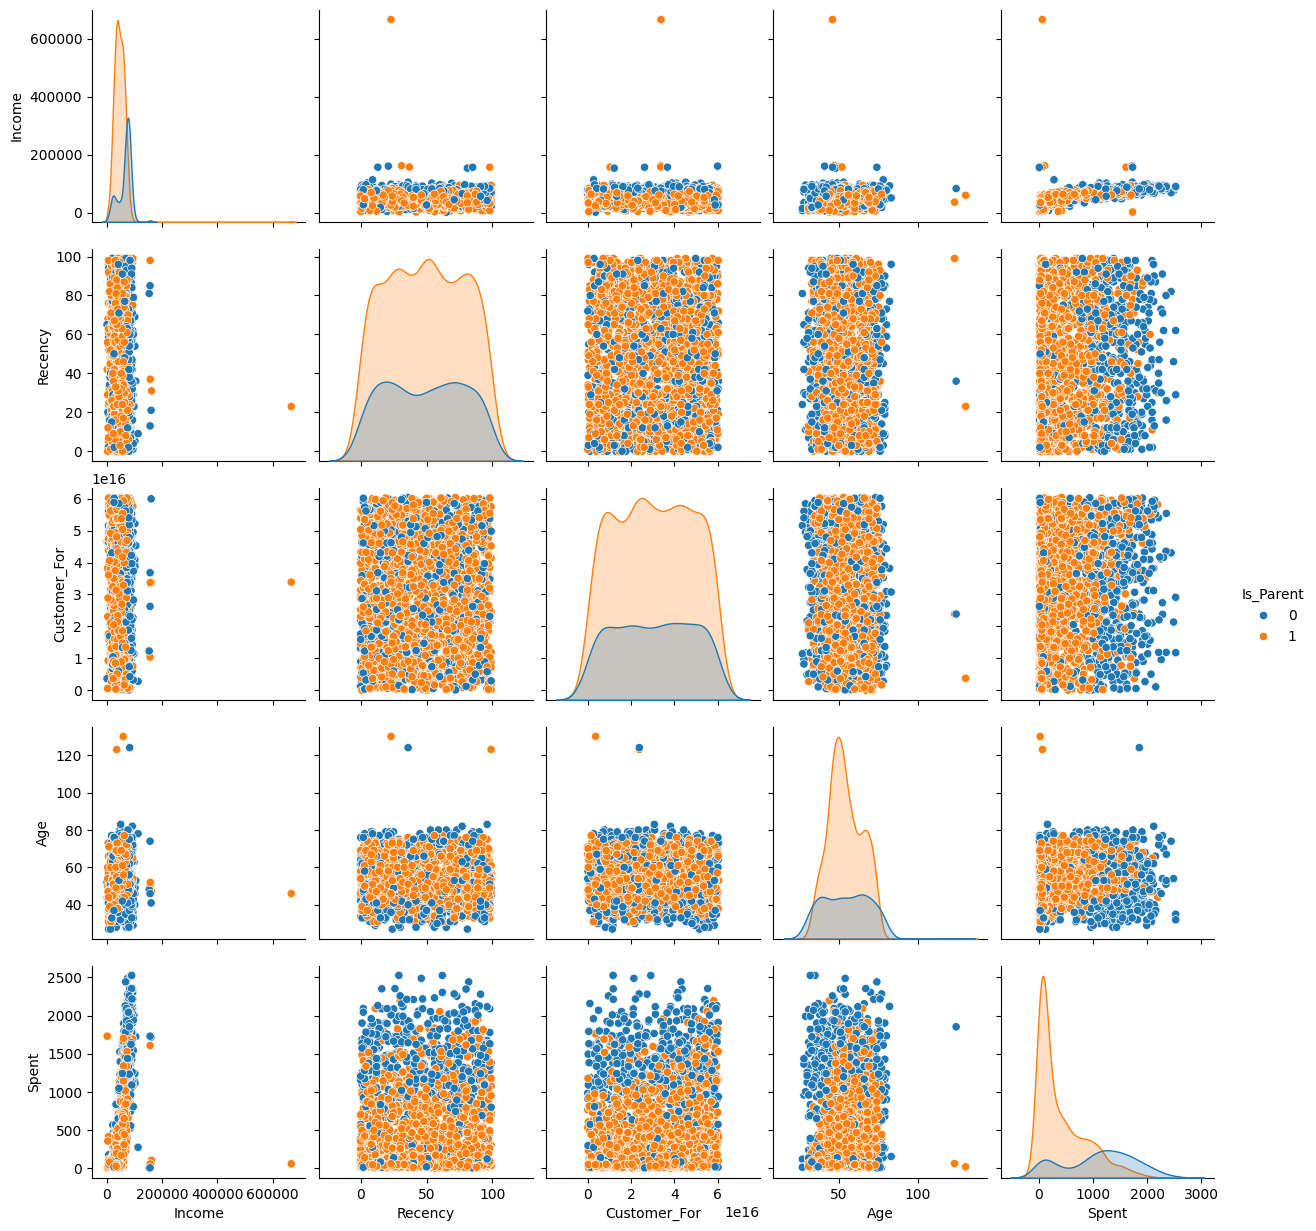

In [21]:
# graficar algunas características
plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[plot], hue="Is_Parent")
# Taking hue
plt.show()

#### Eliminación de outliers

Limitar age (<90) e income (<600000)


In [22]:
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]
print("La cantidad de datos después de eliminar outliers es:", len(data))

La cantidad de datos después de eliminar outliers es: 2212


#### Examinar la correlación de las variables


<Axes: >

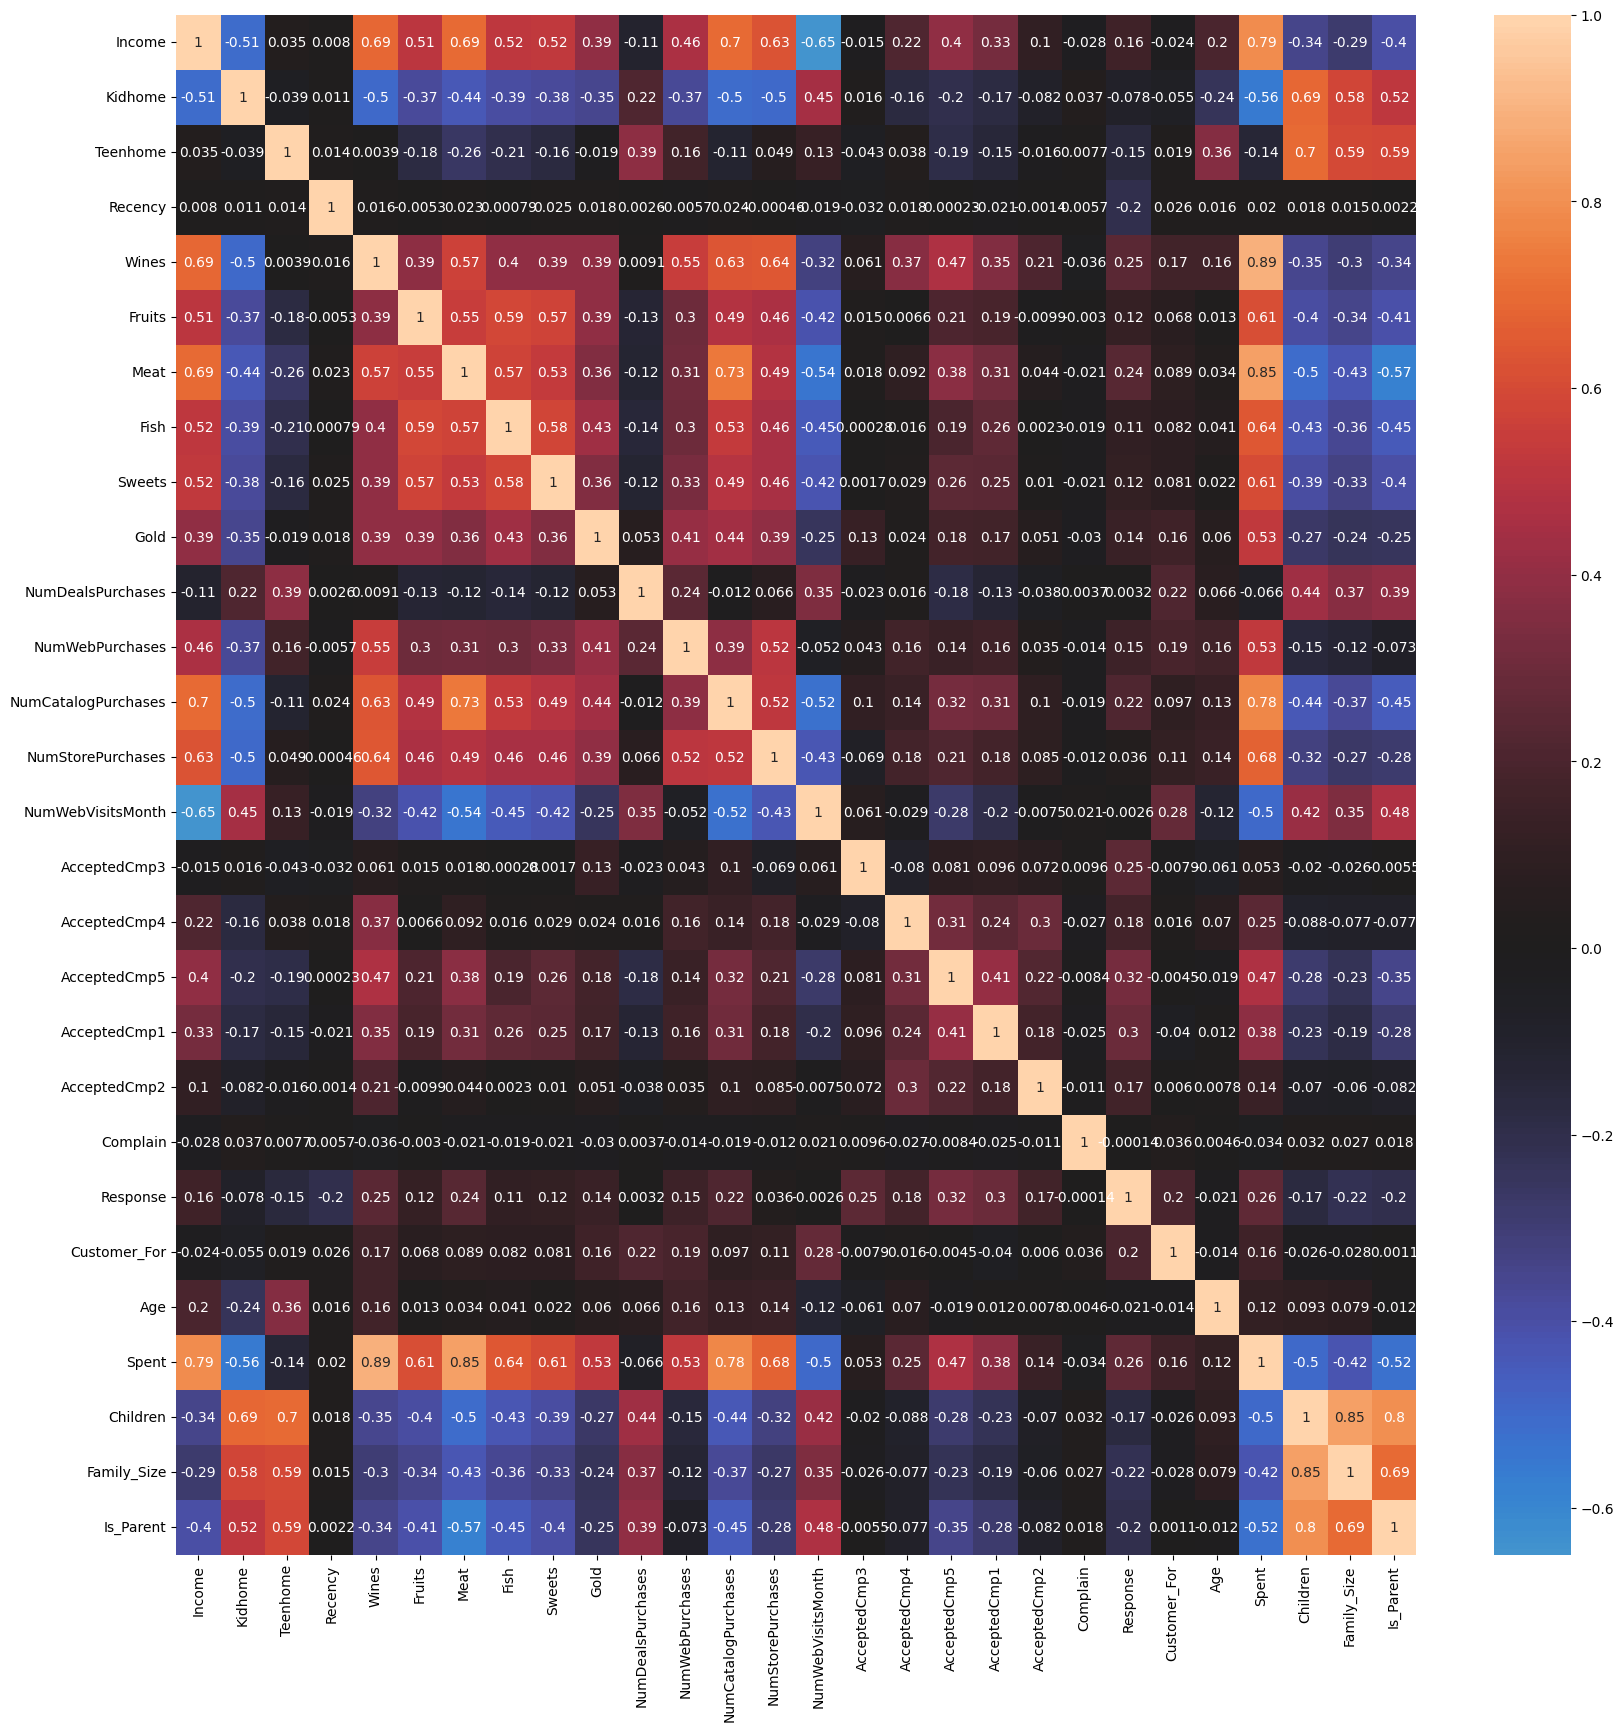

In [24]:
data_numeric = data.select_dtypes(include=[np.number])
corrmat = data_numeric.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, center=0)

#### Transformar las variables categóricas

1. Listar las variables categóricas
2. Transformar (codificar) las variables categóricas


In [25]:
s = data.dtypes == "object"
object_cols = list(s[s].index)
print("Variables categóricas en el conjunto de datos: {}".format(object_cols))
print(data.head())

Variables categóricas en el conjunto de datos: ['Education', 'Living_With']
      Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0   172      88  ...             0         0         1  57283200000000000   
1     2       1  ...             0         0         0   9763200000000000   
2   111      21  ...             0         0         0  26956800000000000   
3    10       3  ...             0         0         0  12009600000000000   
4    46      27  ...             0         0         0  13910400000000000   

In [26]:
# Etiquetar y codificar las características
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("Todas las características son numéricas")
print(data.head())

Todas las características son numéricas
   Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  Age  \
0      88  ...             0         0         1  57283200000000000   66   
1       1  ...             0         0         0   9763200000000000   69   
2      21  ...             0         0         0  26956800000000000   58   
3       3  ...             0         0         0  12009600000000000   39   
4      27  ...             0         0         0  13910400000000000   42   

   Spent  Living_With 

#### Estandarizar los datos

1. Crear una copia del dataset
2. Eliminar columnas irrelevantes
3. Escalar los datos - Estandarizarlos


In [27]:
# Crear una copia de los datos
ds = data.copy()
# Crear un dataframe eliminando las características de promociones
cols_del = [
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "Complain",
    "Response",
]
ds = ds.drop(cols_del, axis=1)

# Escalar la data
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
print("Todas las características estan estandarizadas")

Todas las características estan estandarizadas


In [28]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

## Reducción de la dimensionalidad

Recordemos que este problema se resolverá usando una técnica de clasificación; por lo tanto, hay muchos factores (características) en función de los cuales se realizará la clasificación. Por lo tanto:<br>

1. Cuanto mayor sea el número de características, más difícil será trabajar con ellas. <br>
2. Muchas de las características están correlacionadas (son redundantes). <br>
3. La reducción de la dimensionalidad consiste en reducir el número de variables consideradas, obteniendo un conjunto de variables principales.


In [29]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Análisis de Componentes Principales (PCA)

1. Ajustar el modelo PCA con todas las características
2. Obtener la varianza explicativa (para medir cuánta información de las variables originales es capturada por cada componente principal)
3. Calcular la cantidad óptima de componentes a cosiderar
4. Ajustar de nuevo el modelo PCA con la cantidad óptima de componentes


In [30]:
pca = PCA().fit(scaled_ds)
eigenvalues = pca.explained_variance_
componentes = np.sum(eigenvalues > 1)
print(componentes)
varianzas_explicativas = pca.explained_variance_ratio_
print(
    "Las varianzas explicativas de los coponentes son: {}".format(
        varianzas_explicativas
    )
)

6
Las varianzas explicativas de los coponentes son: [3.60113213e-01 1.26998440e-01 6.59289509e-02 5.72098514e-02
 4.79047613e-02 4.37051217e-02 4.13535897e-02 3.64384786e-02
 3.32708771e-02 2.80407247e-02 2.62435297e-02 2.40377232e-02
 1.95266325e-02 1.84444375e-02 1.70333844e-02 1.50663643e-02
 1.20677535e-02 1.03942835e-02 8.67574245e-03 7.54614025e-03
 9.51290987e-17 8.61632599e-17 0.00000000e+00]


In [31]:
pca = PCA(n_components=componentes)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(
    pca.transform(scaled_ds), columns=(["col1", "col2", "col3", "col4", "col5", "col6"])
)
PCA_ds.describe()

col1          col2          col3          col4          col5  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean   5.781993e-17  6.424437e-17  1.244735e-17 -5.621382e-18  5.541077e-17   
std    2.878602e+00  1.709469e+00  1.231687e+00  1.147354e+00  1.049908e+00   
min   -5.978124e+00 -4.194757e+00 -3.625248e+00 -3.127582e+00 -3.103334e+00   
25%   -2.539470e+00 -1.323929e+00 -8.537126e-01 -7.588275e-01 -7.044357e-01   
50%   -7.815948e-01 -1.737210e-01 -5.084236e-02 -1.235058e-02 -4.181011e-03   
75%    2.386380e+00  1.234851e+00  8.639740e-01  8.880475e-01  7.359008e-01   
max    7.452915e+00  6.168189e+00  6.750458e+00  3.403542e+00  2.975186e+00   

               col6  
count  2.212000e+03  
mean   1.084124e-17  
std    1.002832e+00  
min   -2.421065e+00  
25%   -8.157237e-01  
50%   -1.408650e-02  
75%    8.190612e-01  
max    2.242013e+00

## Clustering

Es una técnica de aprendizaje no supervisado que consiste en dividir un conjunto de datos en grupos, donde los elementos dentro de un mismo grupo son más similares entre sí que con los elementos de otros grupos. <br>

El clustering aglomerativo es un método de clustering que consiste en fusionar muestras hasta alcanzar el número deseado de clusters.<br>

#### 1. Hallar el número óptimo de clusters


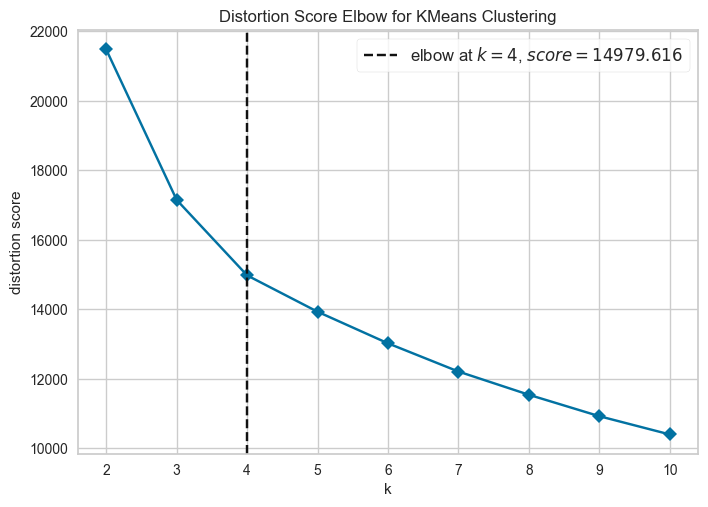

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans(n_clusters=3, random_state=42, n_init=10)
codo = KElbowVisualizer(modelo, k=10, timings=False)
codo.fit(PCA_ds)
codo.show()

#### 2. Definir y ejecutar el modelo de clasificación


In [34]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=4)
predicciones = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = predicciones
data["Clusters"] = predicciones

#### 3. Entender la distribución de los clusters


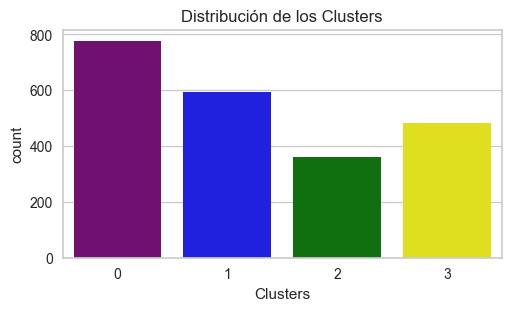

In [35]:
plt.figure(figsize=(5, 3), layout="constrained")
pl = sns.countplot(x=data["Clusters"], palette=["Purple", "Blue", "Green", "Yellow"])
pl.set_title("Distribución de los Clusters")
plt.show()

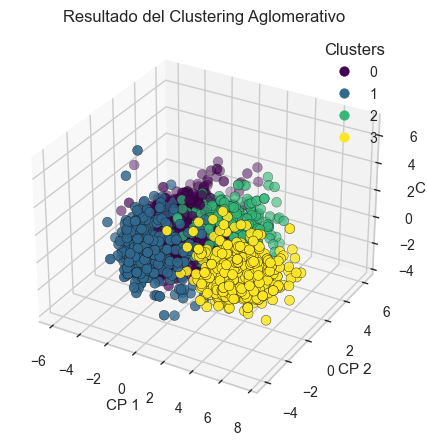

In [36]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    PCA_ds["col1"],
    PCA_ds["col2"],
    PCA_ds["col3"],
    c=PCA_ds["Clusters"],
    cmap="viridis",
    edgecolor="k",
    s=50,
)

ax.set_title("Resultado del Clustering Aglomerativo")
ax.set_xlabel("CP 1")
ax.set_ylabel("CP 2")
ax.set_zlabel("CP 3")
ax.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

In [43]:
import plotly.express as px

fig = px.scatter_3d(
    PCA_ds, x="col1", y="col2", z="col3", color="Clusters", size_max=8, opacity=0.7
)
fig.update_layout(
    title="Resultado del Clustering Aglomerativo",
    scene=dict(
        xaxis_title="CP1",
        yaxis_title="CP2",
        zaxis_title="CP3",
    ),
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [44]:
analisis_cluster = data.groupby("Clusters").describe()
for col in analisis_cluster.columns.levels[0]:
    print("Análisis de cluster para {}:".format(col))
    print(analisis_cluster[col])
    print("--------------------------------------------------------")

Análisis de cluster para Education:
          count      mean       std  min  25%  50%  75%  max
Clusters                                                    
0         778.0  0.616967  0.635557  0.0  0.0  1.0  1.0  2.0
1         592.0  0.706081  0.783564  0.0  0.0  1.0  1.0  2.0
2         359.0  0.495822  0.620289  0.0  0.0  0.0  1.0  2.0
3         483.0  0.565217  0.651675  0.0  0.0  0.0  1.0  2.0
--------------------------------------------------------
Análisis de cluster para Income:
          count          mean           std      min       25%      50%  \
Clusters                                                                  
0         778.0  47099.092545  14266.688821   4023.0  38064.75  46734.0   
1         592.0  30735.736486  13552.632986   1730.0  22568.25  30007.0   
2         359.0  65415.206128  12247.689348   2447.0  58683.00  64961.0   
3         483.0  75797.474120  12860.515500  22507.0  69690.00  76618.0   

               75%       max  
Clusters                  

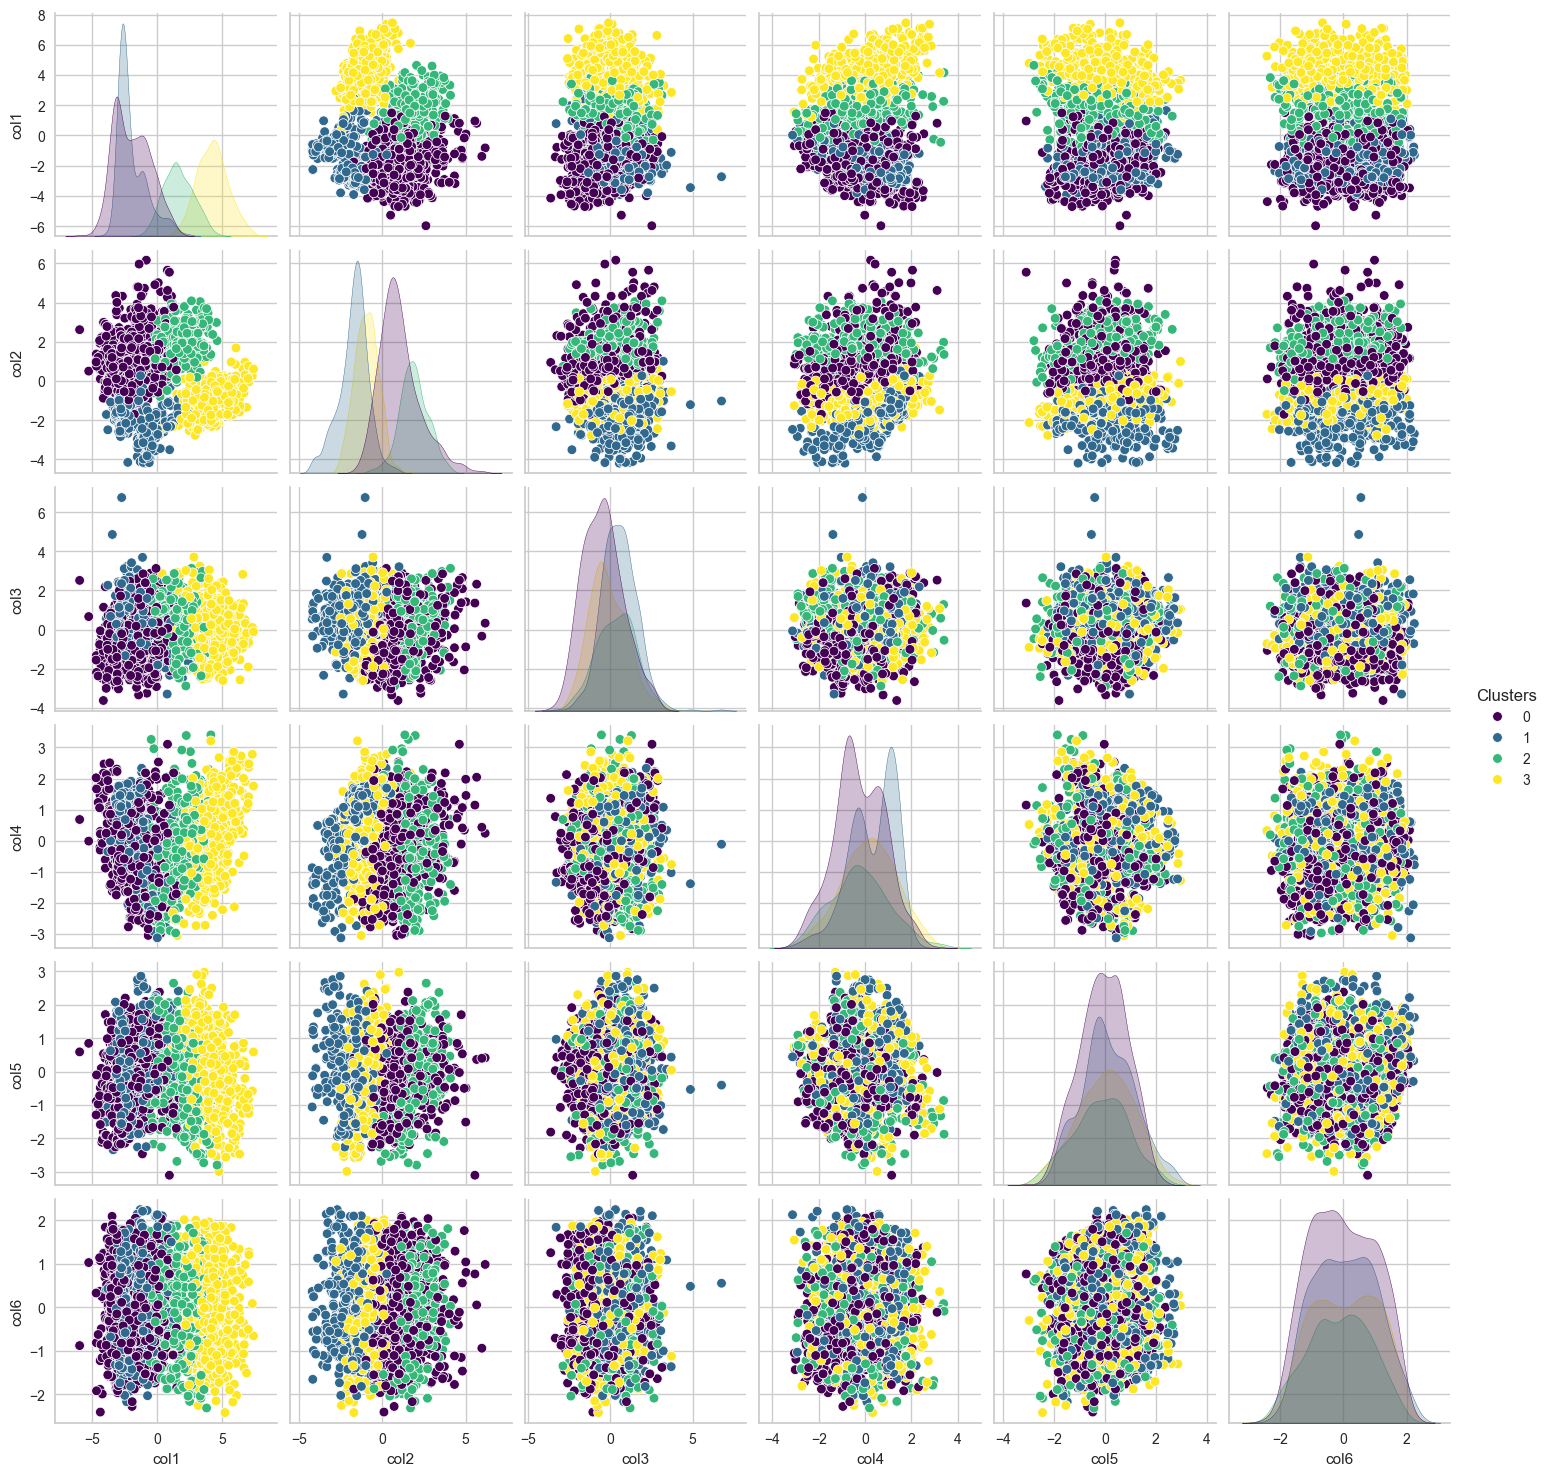

In [45]:
sns.pairplot(PCA_ds, hue="Clusters", palette="viridis", markers="o")
plt.show()

#### 4. Profiling

1. Perfilamiento basado en Ganancias y Gastos


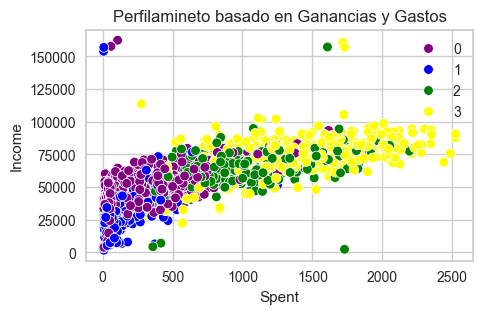

In [46]:
plt.figure(figsize=(5, 3))
pl = sns.scatterplot(
    data=data,
    x=data["Spent"],
    y=data["Income"],
    hue=data["Clusters"],
    palette=["Purple", "Blue", "Green", "Yellow"],
)
pl.set_title("Perfilamineto basado en Ganancias y Gastos")
plt.legend()
plt.show()

2. Suma de promociones aceptadas por los clientes


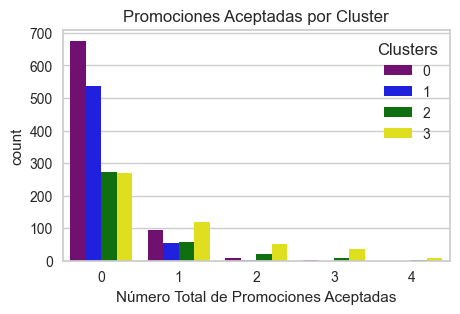

In [47]:
data["Total_Promos"] = (
    data["AcceptedCmp1"]
    + data["AcceptedCmp2"]
    + data["AcceptedCmp3"]
    + data["AcceptedCmp4"]
    + data["AcceptedCmp5"]
)

plt.figure(figsize=(5, 3))
pl = sns.countplot(
    x=data["Total_Promos"],
    hue=data["Clusters"],
    palette=["Purple", "Blue", "Green", "Yellow"],
)
pl.set_title("Promociones Aceptadas por Cluster")
pl.set_xlabel("Número Total de Promociones Aceptadas")
plt.show()

3. Analizar la relación entre edad y gasto


<Figure size 500x300 with 0 Axes>

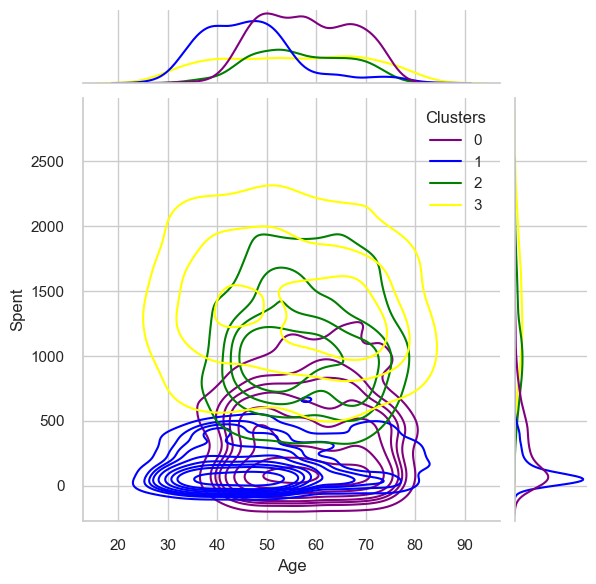

In [48]:
plt.figure(figsize=(5, 3))
sns.set(style="whitegrid")
g = sns.jointplot(
    x="Age",
    y="Spent",
    data=data,
    hue="Clusters",
    kind="kde",
    palette=["Purple", "Blue", "Green", "Yellow"],
)
plt.show()

4. Analizar la relación entre el gasto y:

- Paternidad
- Educación
- Convivencia
- Tamaño de la familia
- Hijos


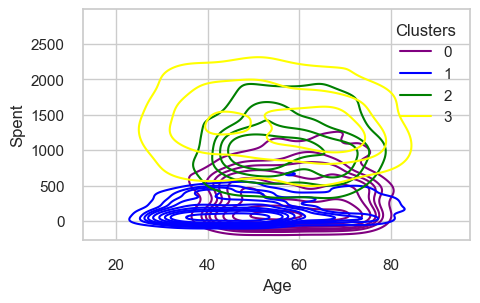

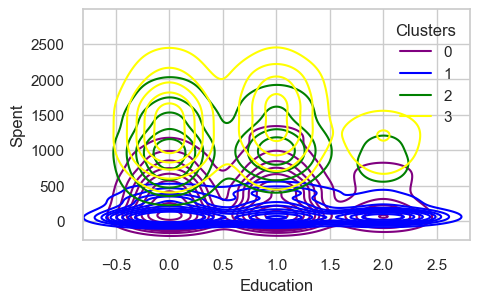

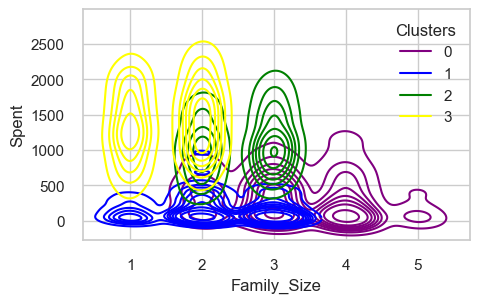

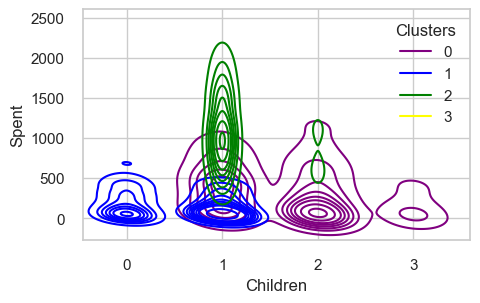

In [49]:
Personal = ["Age", "Education", "Family_Size", "Children"]

for i in Personal:
    plt.figure(figsize=(5, 3))
    sns.kdeplot(
        x=i,
        y="Spent",
        data=data,
        fill=False,
        hue=data["Clusters"],
        palette=["Purple", "Blue", "Green", "Yellow"],
    )
    plt.show()